In [39]:
import json
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoModel, AutoTokenizer

In [40]:

# 텍스트 정제 하는 부분
def text_cleaning(text):
    # Perform text cleaning here
    text = text.lower()  # Convert text to lowercase

    pattern = r"[^a-zA-Z0-9 .]"

    text = re.sub(pattern, "", text)  # Remove non-alphanumeric characters

    # Replace multiple consecutive spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Additional cleaning steps can be added as needed
    return text

In [34]:
# JSON 파일 로드
with open('final_report.json', 'r') as file:
    data = json.load(file)

In [35]:
# Create lists to store impression and findings data
impression_list = []
findings_list = []
study_id_list = []  # Added to store study_id

# Extract impression, findings, and study_id data from JSON
for study_id, study_data in data.items():
    impression = study_data['Impression']
    findings = study_data['Findings']
    impression_list.append(impression)
    findings_list.append(findings)
    study_id_list.append(study_id)

# Create pandas DataFrame
df = pd.DataFrame({'Study_ID': study_id_list, 'Impression': impression_list, 'Findings': findings_list})

# Apply text cleaning to Impression and Findings columns
df['Impression'] = df['Impression'].apply(text_cleaning)
df['Findings'] = df['Findings'].apply(text_cleaning)

In [36]:
# 데이터 분할
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# 결과 확인
print(f"Training Set: {len(train_df)} samples")
print(f"Validation Set: {len(valid_df)} samples")
print(f"Test Set: {len(test_df)} samples")

Training Set: 85202 samples
Validation Set: 18258 samples
Test Set: 18258 samples


In [37]:
# Tokenization Process
model = AutoModel.from_pretrained("microsoft/BiomedVLP-CXR-BERT-general")
tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedVLP-CXR-BERT-general")

# Tokenization function
def tokenize_function(text):
    tokens = tokenizer(text, truncation=True, padding='max_length', max_length=512)
    return tokens['input_ids']  # Accessing the tokenized text using 'input_ids'

# Tokenize the data after splitting
train_df['Impression_Tokenized'] = train_df['Impression'].apply(lambda x: tokenize_function(x))
train_df['Findings_Tokenized'] = train_df['Findings'].apply(lambda x: tokenize_function(x))

valid_df['Impression_Tokenized'] = valid_df['Impression'].apply(lambda x: tokenize_function(x))
valid_df['Findings_Tokenized'] = valid_df['Findings'].apply(lambda x: tokenize_function(x))

test_df['Impression_Tokenized'] = test_df['Impression'].apply(lambda x: tokenize_function(x))
test_df['Findings_Tokenized'] = test_df['Findings'].apply(lambda x: tokenize_function(x))

print(train_df.head())
print(valid_df.head())
print(test_df.head())

       Study_ID                                         Impression  \
5204   50437968              no acute cardiopulmonary abnormality.   
24628  52049821  mild pulmonary edema with no new focal consoli...   
88903  57420765  previously visualized left upper lobe opacity ...   
61464  55137918  left lower lobe consolidation which given left...   
61123  55110128  multifocal infection with superimposed moderat...   

                                                Findings  \
5204   the cardiac mediastinal and hilar contours are...   
24628  tracheostomy tube projects over the upper thor...   
88903  the previously visualized left upper lobe opac...   
61464  frontal and lateral chest radiographs demonstr...   
61123  since the prior studies is been interval progr...   

                                    Impression_Tokenized  \
5204   [2, 1858, 2642, 8384, 7416, 18, 3, 0, 0, 0, 0,...   
24628  [2, 3024, 3004, 3750, 1719, 1858, 2390, 5233, ...   
88903  [2, 3451, 7541, 2279, 3802, 485

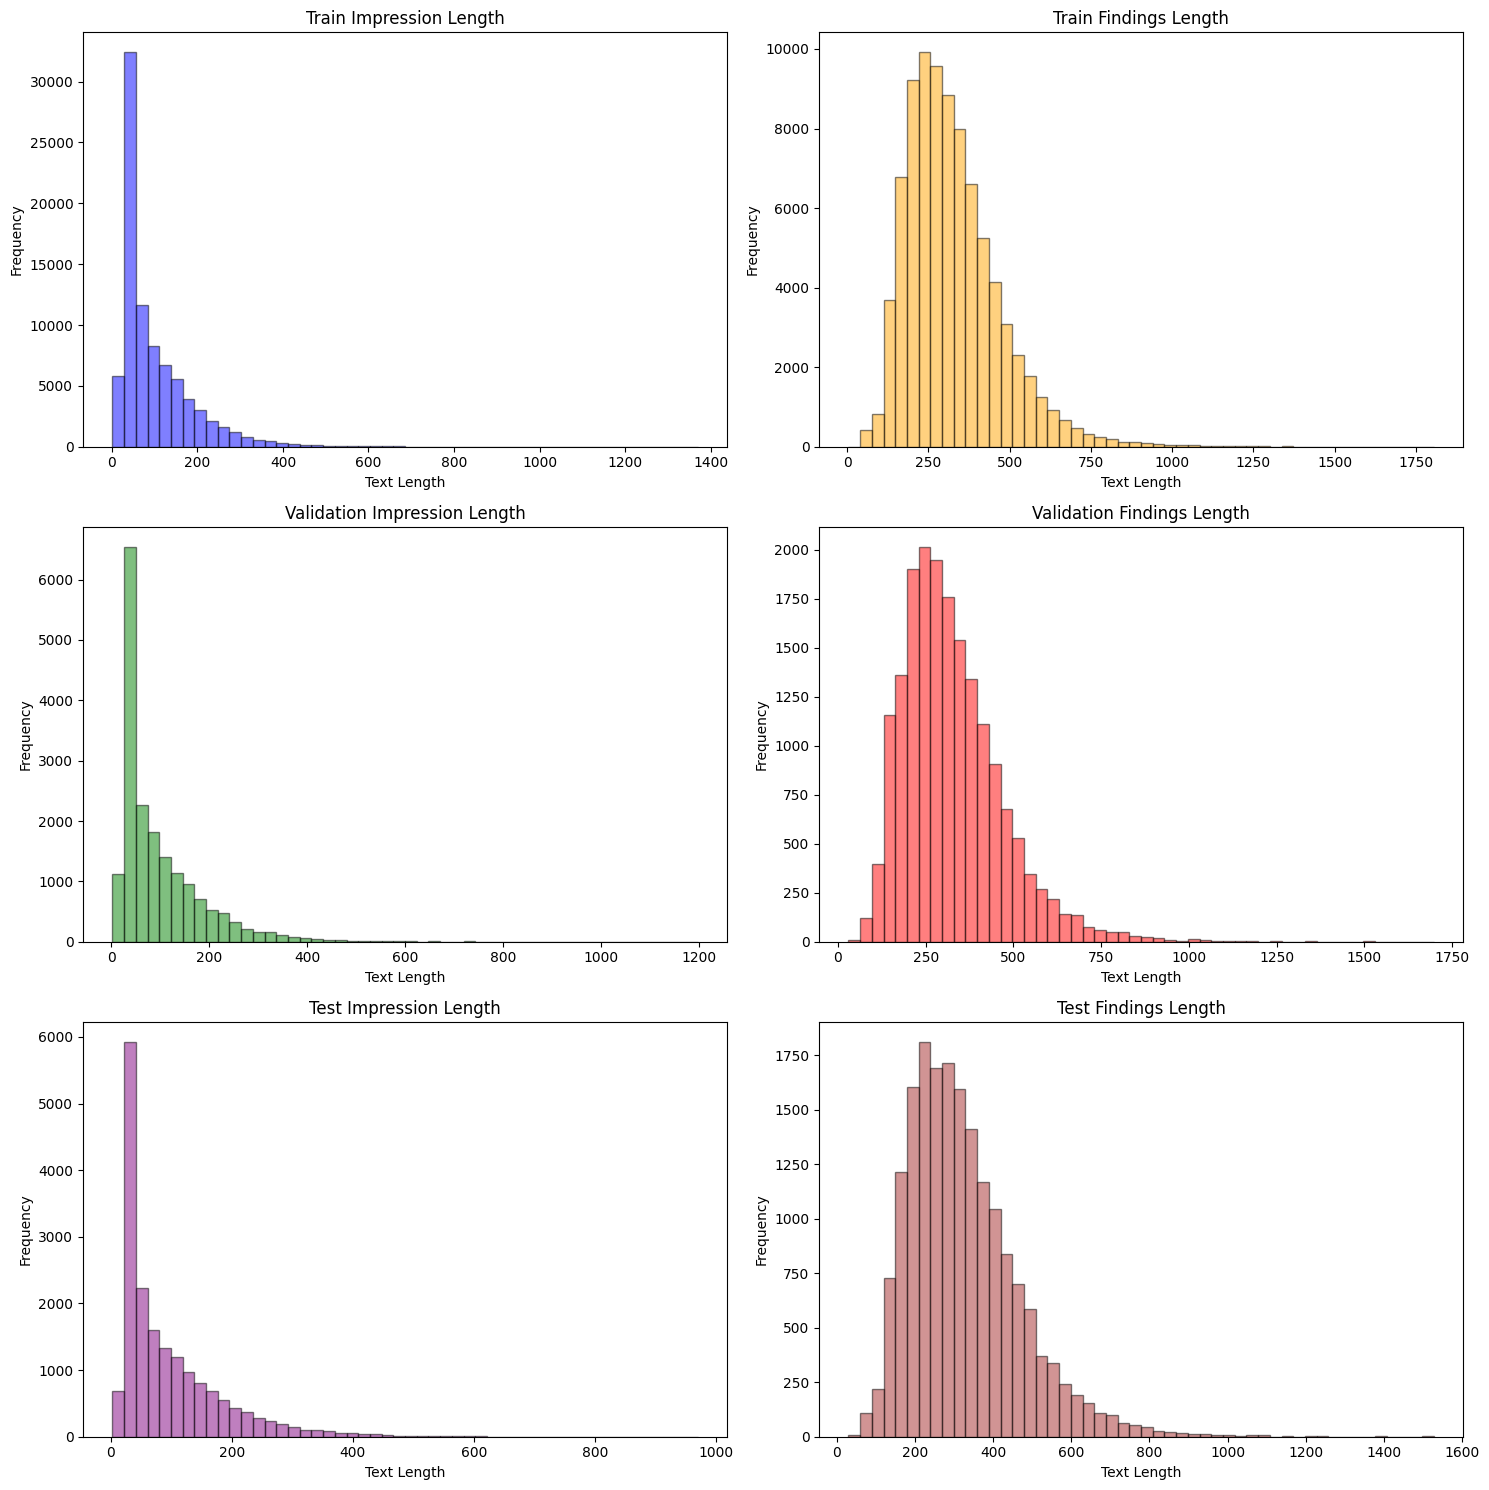

Summary Statistics for Impression in Train Set:
count    85202.000000
mean        97.510598
std         88.254220
min          1.000000
25%         33.000000
50%         65.000000
75%        133.000000
max       1370.000000

Summary Statistics for Findings in Train Set:
count    85202.000000
mean       326.560855
std        147.356714
min          4.000000
25%        222.000000
50%        301.000000
75%        401.000000
max       1805.000000

Summary Statistics for Impression in Valid Set:
count    18258.000000
mean        97.364005
std         88.780030
min          2.000000
25%         33.000000
50%         64.000000
75%        133.000000
max       1198.000000

Summary Statistics for Findings in Valid Set:
count    18258.000000
mean       326.093767
std        145.520396
min         30.000000
25%        223.000000
50%        301.000000
75%        400.000000
max       1698.000000

Summary Statistics for Impression in Test Set:
count    18258.000000
mean        97.868660
std         8

In [38]:
import matplotlib.pyplot as plt

# Calculate text length for each set
train_df['Impression_Length'] = train_df['Impression'].apply(len)
train_df['Findings_Length'] = train_df['Findings'].apply(len)

valid_df['Impression_Length'] = valid_df['Impression'].apply(len)
valid_df['Findings_Length'] = valid_df['Findings'].apply(len)

test_df['Impression_Length'] = test_df['Impression'].apply(len)
test_df['Findings_Length'] = test_df['Findings'].apply(len)

# Visualize text length distribution for each set separately
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Train Set
axes[0, 0].hist(train_df['Impression_Length'], bins=50, alpha=0.5, color='blue', edgecolor='black')
axes[0, 0].set_title('Train Impression Length')
axes[0, 0].set_xlabel('Text Length')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(train_df['Findings_Length'], bins=50, alpha=0.5, color='orange', edgecolor='black')
axes[0, 1].set_title('Train Findings Length')
axes[0, 1].set_xlabel('Text Length')
axes[0, 1].set_ylabel('Frequency')

# Validation Set
axes[1, 0].hist(valid_df['Impression_Length'], bins=50, alpha=0.5, color='green', edgecolor='black')
axes[1, 0].set_title('Validation Impression Length')
axes[1, 0].set_xlabel('Text Length')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(valid_df['Findings_Length'], bins=50, alpha=0.5, color='red', edgecolor='black')
axes[1, 1].set_title('Validation Findings Length')
axes[1, 1].set_xlabel('Text Length')
axes[1, 1].set_ylabel('Frequency')

# Test Set
axes[2, 0].hist(test_df['Impression_Length'], bins=50, alpha=0.5, color='purple', edgecolor='black')
axes[2, 0].set_title('Test Impression Length')
axes[2, 0].set_xlabel('Text Length')
axes[2, 0].set_ylabel('Frequency')

axes[2, 1].hist(test_df['Findings_Length'], bins=50, alpha=0.5, color='brown', edgecolor='black')
axes[2, 1].set_title('Test Findings Length')
axes[2, 1].set_xlabel('Text Length')
axes[2, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary Statistics for each set
train_impression_stats = train_df['Impression_Length'].describe()
train_findings_stats = train_df['Findings_Length'].describe()

valid_impression_stats = valid_df['Impression_Length'].describe()
valid_findings_stats = valid_df['Findings_Length'].describe()

test_impression_stats = test_df['Impression_Length'].describe()
test_findings_stats = test_df['Findings_Length'].describe()

print("Summary Statistics for Impression in Train Set:")
print(train_impression_stats.to_string())
print("\nSummary Statistics for Findings in Train Set:")
print(train_findings_stats.to_string())

print("\nSummary Statistics for Impression in Valid Set:")
print(valid_impression_stats.to_string())
print("\nSummary Statistics for Findings in Valid Set:")
print(valid_findings_stats.to_string())

print("\nSummary Statistics for Impression in Test Set:")
print(test_impression_stats.to_string())
print("\nSummary Statistics for Findings in Test Set:")
print(test_findings_stats.to_string())


In [42]:
#print(train_df['Impression_Tokenized'].head())
#print(train_df['Findings_Tokenized'].head())

from collections import Counter

# Flatten the tokenized lists for Impression and Findings in the train set
impression_text = df['Impression'].str.split().explode().tolist()
findings_text = df['Findings'].str.split().explode().tolist()

# Calculate token frequencies for Impression and Findings
word_freq_impression = Counter(impression_text)
word_freq_findings = Counter(findings_text)

print("Top 30 Impression Words:")
print(word_freq_impression.most_common(30))

print("\nTop 30 Findings Words:")
print(word_freq_findings.most_common(30))


Top 30 Impression Words:
[('no', 74919), ('the', 56302), ('acute', 49506), ('of', 47308), ('cardiopulmonary', 36054), ('process.', 33010), ('right', 30793), ('in', 27451), ('with', 25767), ('left', 25419), ('and', 23924), ('to', 22747), ('pleural', 20835), ('pulmonary', 20287), ('is', 19608), ('lung', 16255), ('evidence', 14986), ('1.', 14385), ('mild', 14299), ('2.', 14027), ('pneumonia.', 13551), ('for', 13061), ('be', 13054), ('or', 12165), ('small', 11623), ('lower', 10905), ('opacity', 10825), ('chest', 10561), ('atelectasis', 10553), ('on', 10347)]

Top 30 Findings Words:
[('the', 400386), ('is', 323162), ('are', 180156), ('no', 161631), ('and', 147042), ('of', 128193), ('there', 125539), ('pleural', 100846), ('right', 88689), ('or', 88154), ('in', 86950), ('effusion', 79463), ('left', 63952), ('pneumothorax.', 56638), ('with', 55220), ('a', 54237), ('lung', 52768), ('lungs', 52608), ('to', 50466), ('pulmonary', 50286), ('normal.', 49673), ('mediastinal', 46394), ('focal', 44130)

In [45]:
import stanza
import pandas as pd
import torch

# GPU 사용 가능 여부 확인
print(torch.cuda.is_available())

# Stanza 라이브러리와 영어 모델 설치
# !pip install stanza
stanza.download('en')

# Initialize Stanza pipeline for English, with GPU support if available
nlp = stanza.Pipeline(lang='en', use_gpu=torch.cuda.is_available())

def analyze_structure(text):
    # 리스트의 항목을 문자열로 변환 후 문자열로 결합
    if isinstance(text, list):
        text = ' '.join(map(str, text))  # 각 항목을 문자열로 변환
    # Process the text with Stanza pipeline
    doc = nlp(text)
    
    # Extract and return parsed dependencies
    dependencies = []
    for sent in doc.sentences:
        for dep_edge in sent.dependencies:
            dependencies.append((dep_edge[2].text, dep_edge[0].id, dep_edge[1]))
    
    return dependencies

# Apply sentence structure analysis to 'Impression_Tokenized' and 'Findings_Tokenized' columns
valid_df['Impression_Sentence_Structure'] = valid_df['Impression_Tokenized'].apply(analyze_structure)
valid_df['Findings_Sentence_Structure'] = valid_df['Findings_Tokenized'].apply(analyze_structure)

# Display the DataFrame with sentence structure analysis results
print(valid_df.head())

True


2024-03-30 16:39:54 INFO: Downloaded file to C:\Users\smska\stanza_resources\resources.json
2024-03-30 16:39:54 INFO: Downloading default packages for language: en (English) ...
2024-03-30 16:39:55 INFO: File exists: C:\Users\smska\stanza_resources\en\default.zip
2024-03-30 16:39:58 INFO: Finished downloading models and saved to C:\Users\smska\stanza_resources
2024-03-30 16:39:58 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-03-30 16:39:58 INFO: Downloaded file to C:\Users\smska\stanza_resources\resources.json
2024-03-30 16:39:59 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2024-03-30 16:39:59 INFO: Using device: cuda
2024-03-30 16:39:59 INFO: Loading: tokenize
2024-03-30 16:39:59 INFO: Loading: mwt
2024-03-30 16:39:59 INFO: Loading: pos
2024-03-30 16:40:00 INFO: Loading: lemma
2024-03-30 16:40:00 INFO: Loading: constituency
2024-03-30 16:40:01 INFO: Loading: depparse
2024-03-30 16:40:01 INFO: Loading: sentiment
2024-03-30 16:40:01 INFO: Loading: ne

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import AutoModel, AutoTokenizer
import numpy as np

# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.iloc[idx]['Impression']
        tokens = self.tokenizer(text, truncation=True, padding='max_length', max_length=512, return_tensors='pt')
        return {
            'input_ids': tokens['input_ids'].squeeze(),
            'attention_mask': tokens['attention_mask'].squeeze()
        }

# Load the model and tokenizer
model = AutoModel.from_pretrained("microsoft/BiomedVLP-CXR-BERT-general")
tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedVLP-CXR-BERT-general")

# Create datasets and dataloaders for train and valid sets
train_dataset = CustomDataset(train_df, tokenizer)
valid_dataset = CustomDataset(valid_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=6, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=6)

# Define the training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = optim.AdamW(model.parameters(), lr=5e-5)
criterion = nn.CrossEntropyLoss()

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        
        # Perform your specific task here, e.g., classification
        # For example:
        # logits = outputs.last_hidden_state.mean(dim=1)  # Example for averaging hidden states
        # loss = criterion(logits, targets)  # Example loss calculation
        
        # loss.backward()
        # optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        for batch in valid_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask)
            
            # Perform evaluation here
            
# After training, you can use the test set for final evaluation
# test_dataset = CustomDataset(test_df, tokenizer)
# test_loader = DataLoader(test_dataset, batch_size=8)
# Perform evaluation on the test set similarly to the validation set


OutOfMemoryError: CUDA out of memory. Tried to allocate 72.00 MiB (GPU 0; 8.00 GiB total capacity; 7.19 GiB already allocated; 0 bytes free; 7.27 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [13]:
import stanza

# Download the English model for stanza
stanza.download('en')

# Initialize the English pipeline
nlp = stanza.Pipeline('en')

# Function to analyze sentence structure
def analyze_sentence_structure(text):
    doc = nlp(text)
    sentences = []
    for sentence in doc.sentences:
        sent_info = {
            'text': sentence.text,
            'tokens': [token.text for token in sentence.tokens],
            'pos_tags': [token.pos for token in sentence.tokens],  # Add part-of-speech tags
            'ner_tags': [token.ner for token in sentence.tokens]   # Add named entity recognition tags
        }
        sentences.append(sent_info)
    return sentences



# Example usage for analyzing sentence structure of tokenized Impression and Findings
train_df['Impression_Sentence_Structure'] = train_df['Impression_Tokenized'].apply(lambda x: analyze_sentence_structure(' '.join(map(str, x))))
train_df['Findings_Sentence_Structure'] = train_df['Findings_Tokenized'].apply(lambda x: analyze_sentence_structure(' '.join(map(str, x))))

valid_df['Impression_Sentence_Structure'] = valid_df['Impression_Tokenized'].apply(lambda x: analyze_sentence_structure(' '.join(map(str, x))))
valid_df['Findings_Sentence_Structure'] = valid_df['Findings_Tokenized'].apply(lambda x: analyze_sentence_structure(' '.join(map(str, x))))

test_df['Impression_Sentence_Structure'] = test_df['Impression_Tokenized'].apply(lambda x: analyze_sentence_structure(' '.join(map(str, x))))
test_df['Findings_Sentence_Structure'] = test_df['Findings_Tokenized'].apply(lambda x: analyze_sentence_structure(' '.join(map(str, x))))



# Display the DataFrame with sentence structure analysis results
print(train_df.head())
print(valid_df.head())
print(test_df.head())



2024-03-30 16:04:02 INFO: Downloaded file to C:\Users\smska\stanza_resources\resources.json
2024-03-30 16:04:02 INFO: Downloading default packages for language: en (English) ...
2024-03-30 16:04:03 INFO: File exists: C:\Users\smska\stanza_resources\en\default.zip
2024-03-30 16:04:06 INFO: Finished downloading models and saved to C:\Users\smska\stanza_resources
2024-03-30 16:04:06 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-03-30 16:04:06 INFO: Downloaded file to C:\Users\smska\stanza_resources\resources.json
2024-03-30 16:04:07 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2024-03-30 16:04:07 INFO: Using device: cuda
2024-03-30 16:04:07 INFO: Loading: tokenize
2024-03-30 16:04:07 INFO: Loading: mwt
2024-03-30 16:04:07 INFO: Loading: pos
2024-03-30 16:04:08 INFO: Loading: lemma
2024-03-30 16:04:08 INFO: Loading: constituency
2024-03-30 16:04:08 INFO: Loading: depparse
2024-03-30 16:04:09 INFO: Loading: sentiment
2024-03-30 16:04:09 INFO: Loading: ne

AttributeError: 'Token' object has no attribute 'pos'

In [ ]:
import stanza
import pandas as pd
import torch

# GPU 사용 가능 여부 확인
print(torch.cuda.is_available())

# Stanza 라이브러리와 영어 모델 설치
# !pip install stanza
stanza.download('en')

# Initialize Stanza pipeline for English, with GPU support if available
nlp = stanza.Pipeline(lang='en', use_gpu=torch.cuda.is_available())

def analyze_structure(text):
    # 리스트의 항목을 문자열로 변환 후 문자열로 결합
    if isinstance(text, list):
        text = ' '.join(map(str, text))  # 각 항목을 문자열로 변환
    # Process the text with Stanza pipeline
    doc = nlp(text)
    
    # Extract and return parsed dependencies
    dependencies = []
    for sent in doc.sentences:
        for dep_edge in sent.dependencies:
            dependencies.append((dep_edge[2].text, dep_edge[0].id, dep_edge[1]))
    
    return dependencies

# Apply sentence structure analysis to 'Impression_Tokenized' and 'Findings_Tokenized' columns
df['Impression_Structure'] = df['Impression_Tokenized'].apply(lambda x: analyze_structure(x))
df['Findings_Structure'] = df['Findings_Tokenized'].apply(lambda x: analyze_structure(x))

print(df.head())
